In [1]:
#!bash /home/dmsm/m.colombo/sharpy.sh
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


import os
import sys

sys.path.append('/scratch/dmsm/m.colombo/sharpy') # go to parent dir
sys.path.append('/home/dmsm/m.colombo/.conda/envs/sharpy_env/lib/python37.zip') # go to parent dir
sys.path.append('/home/dmsm/m.colombo/.conda/envs/sharpy_env/lib/python3.7') # go to parent dir
sys.path.append('/home/dmsm/m.colombo/.conda/envs/sharpy_env/lib/python3.7/lib-dynload') # go to parent dir
sys.path.append('/home/dmsm/m.colombo/.conda/envs/sharpy_env/lib/python3.7/site-packages') # go to parent dir


import numpy as np
import sharpy
from sharpy.utils.h5utils import readh5
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import pickle
import random


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython import display

# HALE sim plotting

In [2]:

data = readh5('/home/dmsm/m.colombo/Documents/sharpy/data/HALE_50_2st2m/output/HALE_50_2st2m_i0_618l2_028/savedata/HALE_50_2st2m_i0_618l2_028.data.h5')

case_data=data.data

dict_keys(['_name', 'dqddt', 'dqdt', 'for_acc', 'for_pos', 'for_vel', 'forces_constraints_FoR', 'forces_constraints_nodes', 'gravity_forces', 'in_global_AFoR', 'mb_FoR_acc', 'mb_FoR_pos', 'mb_FoR_vel', 'mb_dict', 'mb_dquatdt', 'mb_quat', 'num_elem', 'num_node', 'num_node_elem', 'pos', 'pos_ddot', 'pos_dot', 'postproc_cell', 'postproc_node', 'psi', 'psi_ddot', 'psi_dot', 'q', 'quat', 'runtime_generated_forces', 'steady_applied_forces', 'total_forces', 'total_gravity_forces', 'unsteady_applied_forces'])
dict_keys(['aero_steady_forces', 'aero_unsteady_forces'])
[ 3.56152232e-03 -3.87855097e-03  7.57149793e+00 -1.73453327e+00
  4.63688354e-03  1.01169882e-03]


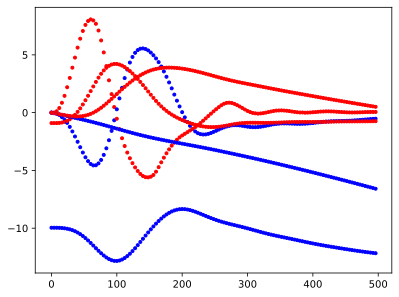

In [9]:
print(case_data.structure.timestep_info[30].__dict__.keys())
print(case_data.structure.timestep_info[30].postproc_node.keys())
print((case_data.structure.timestep_info[30].postproc_node['aero_unsteady_forces'][2]))

for idx_t in range(0,500,4):
    plt.plot(idx_t,case_data.structure.timestep_info[idx_t].dqddt[-10],'b.')
    plt.plot(idx_t,case_data.structure.timestep_info[idx_t].dqddt[-8],'r.')
    plt.plot(idx_t,case_data.structure.timestep_info[idx_t].dqdt[-10],'b.')
    plt.plot(idx_t,case_data.structure.timestep_info[idx_t].dqdt[-8],'r.')
    plt.plot(idx_t,case_data.structure.timestep_info[idx_t].q[-10]/10,'b.')
    plt.plot(idx_t,case_data.structure.timestep_info[idx_t].q[-8],'r.')

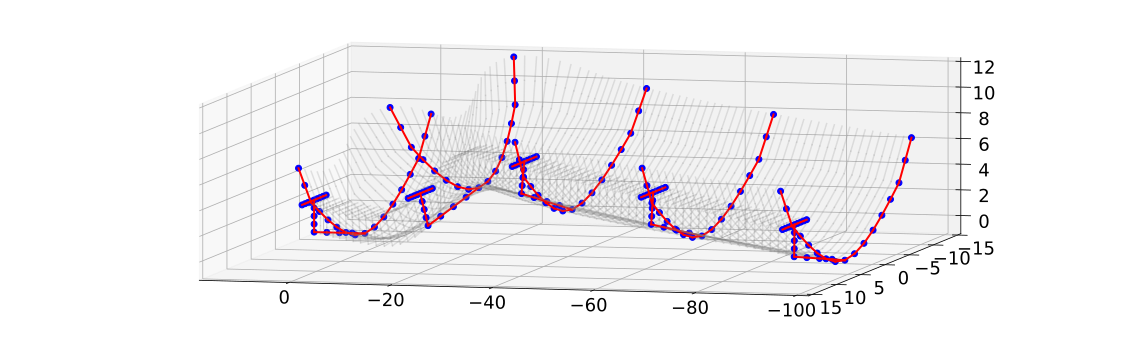

In [33]:

# Define colors
colors = ['red', 'green', 'blue']

fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111, projection='3d', proj_type = 'ortho')
ax.view_init(20, 104)



frames=[0,160,320,500,680]
for idx_t in range(0,681,10):


    dx=case_data.structure.timestep_info[idx_t].q[-10]
    dz=case_data.structure.timestep_info[idx_t].q[-8]
    dth=case_data.structure.timestep_info[idx_t].q[-6]

    #fig, ax = plt.subplots(1, 1, figsize=(6, 12))
    case_data=data.data
    
    sc3d=list()
    #ax = plt.axes(projection='3d')
   
    idx_nodes = np.setdiff1d(np.arange(case_data.structure.timestep_info[0].pos.shape[0]), case_data.structure.connectivities[:, 2])
    x0=np.hstack([0,case_data.structure.timestep_info[idx_t].q[0:(case_data.structure.timestep_info[0].pos.shape[0]-1)*6:6]])
    z0=np.hstack([0,case_data.structure.timestep_info[idx_t].q[2:(case_data.structure.timestep_info[0].pos.shape[0]-1)*6:6]])
    if idx_t in frames:
        ax.plot(case_data.structure.timestep_info[idx_t].pos[idx_nodes, 0]+dx+(case_data.structure.timestep_info[idx_t].pos[idx_nodes, 2]+ z0[idx_nodes])*np.sin(dth), 
                        case_data.structure.timestep_info[idx_t].pos[idx_nodes, 1],
                        case_data.structure.timestep_info[idx_t].pos[idx_nodes, 2]+dz-x0[idx_nodes]*np.sin(dth),'bo')
   

    conn0=case_data.structure.connectivities[:, 0]
    conn1=case_data.structure.connectivities[:, 1]

    if idx_t in frames:
        for id1,id2 in zip(conn0,conn1):
            ax.plot(case_data.structure.timestep_info[idx_t].pos[[id1,id2], 0]+[dx, dx]+(z0[[id1,id2]]+case_data.structure.timestep_info[idx_t].pos[[id1,id2], 2]) *np.sin(dth), 
                    case_data.structure.timestep_info[idx_t].pos[[id1,id2], 1], 
                    case_data.structure.timestep_info[idx_t].pos[[id1,id2], 2]+[dz, dz]-x0[[id1,id2]]*np.sin(dth),'red',linewidth=2)
    else:
        for id1,id2 in zip(conn0,conn1):
            ax.plot(case_data.structure.timestep_info[idx_t].pos[[id1,id2], 0]+[dx, dx]+(z0[[id1,id2]]+case_data.structure.timestep_info[idx_t].pos[[id1,id2], 2]) *np.sin(dth), 
                    case_data.structure.timestep_info[idx_t].pos[[id1,id2], 1], 
                    case_data.structure.timestep_info[idx_t].pos[[id1,id2], 2]+[dz, dz]-x0[[id1,id2]]*np.sin(dth),'gray',alpha=0.2)

    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='both', which='minor', labelsize=18)
    #ax.set_xlabel('x [m]',fontsize=18 )
    #ax.set_ylabel('y [m]',fontsize=18 )
    #ax.set_zlabel('z [m]',fontsize=18 )
    

fig.savefig('HALE_dynamic_gust_example.png')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


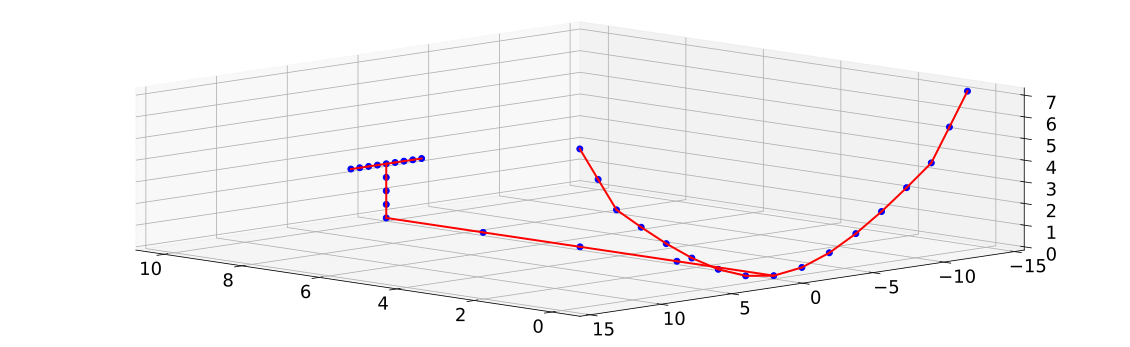

In [56]:


# Define colors
colors = ['red', 'green', 'blue']

fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111, projection='3d', proj_type = 'ortho')
ax.view_init(30, 135)



frames=[0]
for idx_t in frames:


    dx=case_data.structure.timestep_info[idx_t].q[-10]
    dz=case_data.structure.timestep_info[idx_t].q[-8]
    dth=case_data.structure.timestep_info[idx_t].q[-6]

    #fig, ax = plt.subplots(1, 1, figsize=(6, 12))
    case_data=data.data
    
    sc3d=list()
    #ax = plt.axes(projection='3d')
   
    idx_nodes = np.setdiff1d(np.arange(case_data.structure.timestep_info[0].pos.shape[0]), case_data.structure.connectivities[:, 2])
    x0=np.hstack([0,case_data.structure.timestep_info[idx_t].q[0:(case_data.structure.timestep_info[0].pos.shape[0]-1)*6:6]])
    z0=np.hstack([0,case_data.structure.timestep_info[idx_t].q[2:(case_data.structure.timestep_info[0].pos.shape[0]-1)*6:6]])
    if idx_t in frames:
        ax.plot(case_data.structure.timestep_info[idx_t].pos[idx_nodes, 0]+dx+z0[idx_nodes]*np.sin(dth/57.3), 
                        case_data.structure.timestep_info[idx_t].pos[idx_nodes, 1],
                        case_data.structure.timestep_info[idx_t].pos[idx_nodes, 2]+dz-x0[idx_nodes]*np.sin(dth/57.3),'bo')
   

    conn0=case_data.structure.connectivities[:, 0]
    conn1=case_data.structure.connectivities[:, 1]

    if idx_t in frames:
        for id1,id2 in zip(conn0,conn1):
            ax.plot(case_data.structure.timestep_info[idx_t].pos[[id1,id2], 0]+[dx, dx]+z0[[id1,id2]]*np.sin(dth/57.3), 
                    case_data.structure.timestep_info[idx_t].pos[[id1,id2], 1], 
                    case_data.structure.timestep_info[idx_t].pos[[id1,id2], 2]+[dz, dz]-x0[[id1,id2]]*np.sin(dth/57.3),'red',linewidth=2)
    else:
        for id1,id2 in zip(conn0,conn1):
            ax.plot(case_data.structure.timestep_info[idx_t].pos[[id1,id2], 0]+[dx, dx]+z0[[id1,id2]]*np.sin(dth/57.3), 
                    case_data.structure.timestep_info[idx_t].pos[[id1,id2], 1], 
                    case_data.structure.timestep_info[idx_t].pos[[id1,id2], 2]+[dz, dz]-x0[[id1,id2]]*np.sin(dth/57.3),'gray',alpha=0.2)

    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='both', which='minor', labelsize=18)
    #ax.set_xlabel('x [m]',fontsize=18 )
    #ax.set_ylabel('y [m]',fontsize=18 )
    #ax.set_zlabel('z [m]',fontsize=18 )
    


fig.savefig('HALE_structure.eps', format='eps')

In [15]:
import pickle
directory='/home/dmsm/m.colombo/Documents/sharpy/data/'
filename_tr='HALE_50_2st2m_unitloads_tr.pickle'
filename_va='HALE_50_2st2m_unitloads_va.pickle'

 #read pickles with packed data
nodes_tr,    edges_in_tr,    edges_tar_tr,    globals_tr,    senders,    receivers, list_tse_raw    = pickle.load(open(directory+filename_tr, "rb"))
nodes_va,    edges_in_va,    edges_tar_va,    globals_va,    senders,    receivers, list_tse_raw    = pickle.load(open(directory+filename_va, "rb"))
    

In [25]:
#globals_tr.shape
#plt.plot(case_data.structure.timestep_info[idx_t].pos[idx_nodes, 2],'.')
print(np.where((globals_tr[-1,:]>6.17) & (globals_tr[-1,:]<6.19)))

np.max(globals_tr[-1,11955-150:11955+298])


(array([ 5922,  5923,  5924,  5925,  6533,  8531, 10173, 11955, 11979,
       13009, 16145, 16153, 18667]),)


6.013332258309002

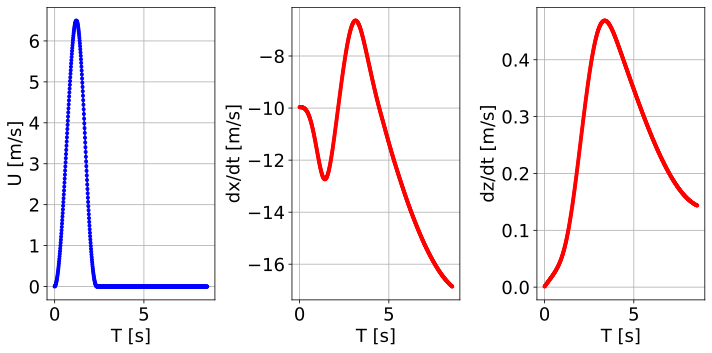

In [31]:
fig,ax = plt.subplots(1,3,figsize=(10,5))

ax[0].plot(np.arange(0,685*0.0125,0.0125),globals_tr[-1,11955-85:11955+600],'b.-') #15692
ax[0].set_xlabel('T [s]',fontsize=18)
ax[0].set_ylabel('U [m/s]',fontsize=18)
ax[0].tick_params(axis='both', which='major', labelsize=18)
ax[0].tick_params(axis='both', which='minor', labelsize=18)
ax[0].grid()

ax[1].plot(np.arange(0,685*0.0125,0.0125),globals_tr[10,11955-85:11955+600],'r.-') #15692
ax[1].set_xlabel('T [s]',fontsize=18)
ax[1].set_ylabel('dx/dt [m/s]',fontsize=18)
ax[1].tick_params(axis='both', which='major', labelsize=18)
ax[1].tick_params(axis='both', which='minor', labelsize=18)
ax[1].grid()

ax[2].plot(np.arange(0,685*0.0125,0.0125),globals_tr[8,11955-85:11955+600],'r.-') #15692
ax[2].set_xlabel('T [s]',fontsize=18)
ax[2].set_ylabel('dz/dt [m/s]',fontsize=18)
ax[2].tick_params(axis='both', which='major', labelsize=18)
ax[2].tick_params(axis='both', which='minor', labelsize=18)
ax[2].grid()

fig.tight_layout()
fig.savefig('Gust.eps', format='eps')


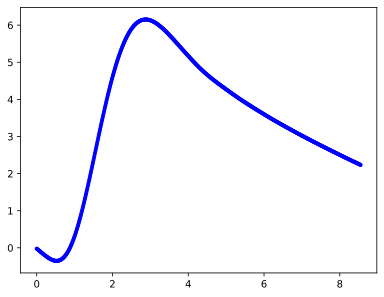

In [52]:
plt.plot(np.arange(0,685*0.0125,0.0125),globals_tr[2,11955-85:11955+600],'b.-') #15692

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.HTMLWriter'> instead.


SystemError: <built-in method write of _io.BufferedWriter object at 0x7f157d1aeb90> returned a result with an error set

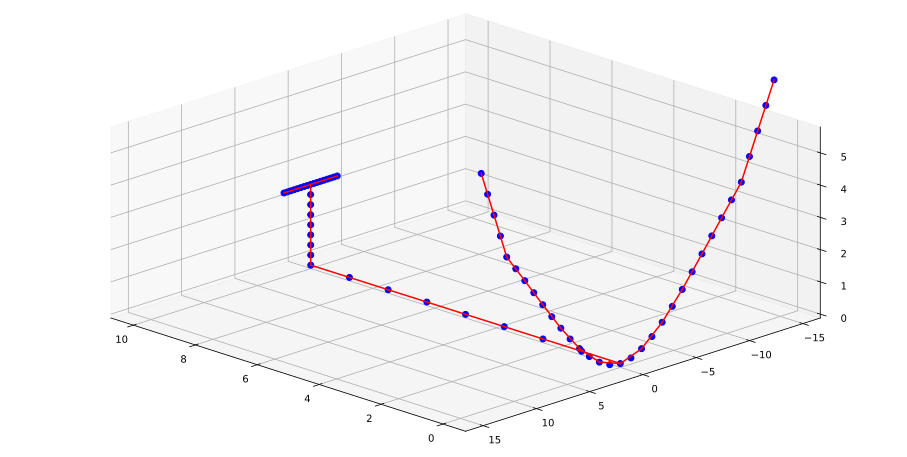

In [59]:

# Define colors
colors = ['red', 'green', 'blue']

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d', proj_type = 'ortho')
ax.view_init(40, 135)

# Animation requirements.
#sc3d =  ax.plot(data.data.structure.timestep_info[0].pos[:,0],data.data.structure.timestep_info[0].pos[:,1],
#                data.data.structure.timestep_info[0].pos[:,2]-data.data.structure.timestep_info[0].pos[:,2],'b.')




#fig, ax = plt.subplots(1, 1, figsize=(6, 12))
case_data=data.data
idx_t=0
sc3d=list()
#ax = plt.axes(projection='3d')
idx_nodes = np.setdiff1d(np.arange(case_data.structure.timestep_info[0].pos.shape[0]), case_data.structure.connectivities[:, 2])
sc3d.append( ax.plot(case_data.structure.timestep_info[idx_t].pos[idx_nodes, 0], 
                  case_data.structure.timestep_info[idx_t].pos[idx_nodes, 1],
                  case_data.structure.timestep_info[idx_t].pos[idx_nodes, 2],'bo'))



conn0=case_data.structure.connectivities[:, 0]
conn1=case_data.structure.connectivities[:, 1]


for id1,id2 in zip(conn0,conn1):
    sc3d.append(ax.plot(case_data.structure.timestep_info[idx_t].pos[[id1,id2], 0], 
            case_data.structure.timestep_info[idx_t].pos[[id1,id2], 1], 
            case_data.structure.timestep_info[idx_t].pos[[id1,id2], 2],'red'))


def update(frame,data,sc3d):
      
    # Animation requirements.
    sc3d[0][0].set_data(data.data.structure.timestep_info[frame].pos[:,0],
                        data.data.structure.timestep_info[frame].pos[:,1])
    sc3d[0][0].set_3d_properties(data.data.structure.timestep_info[frame].pos[:,2])
    
    i=1
    for id1,id2 in zip(conn0,conn1): 
        sc3d[i][0].set_data(case_data.structure.timestep_info[frame].pos[[id1,id2], 0],
                         case_data.structure.timestep_info[frame].pos[[id1,id2], 1])
        sc3d[i][0].set_3d_properties(case_data.structure.timestep_info[frame].pos[[id1,id2], 2])
        i=i+1
    
    

num_frames = len(data.data.structure.timestep_info)        
anim = animation.FuncAnimation(fig, update, fargs=(data, sc3d), frames = range(num_frames))
anim.save('scatter.htm')
    
display.IFrame(src='scatter.htm', width = 1300, height=700)




